## Proyek Analisis Data: Air Quality dataset
* Nama  : Bryan Yapdhika
* Email : bryanyapdhika231@gmail.com
* Id Dicoding   : bryan_yapdhika_wlt3

### Menentukan Pertanyaan Analisis
1. Stasiun manakah yang merekam kualitas udara yang terburuk?
2. Bagaimana perubahan kualitas udara apabila terjadi hujan?
3. Apakah distrik yang memiliki nilai suhu tinggi adalah distrik yang terpolusi?

## Mengimport Library yang akan digunakan

In [95]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import aqi
import os

## 1. Data Wrangling
#### 1.1 Mengumpulkan data

In [96]:
csv_name ="PRSA_Data_combine.csv"
data_path = os.path.join(os.getcwd(), "dataset", "combined_data")
csv_path = os.path.join(data_path, csv_name)

if not (os.path.isfile(csv_path)):
    PRSA_files_rel_path = [f for f in os.listdir('dataset/raw_data') if os.path.isfile('dataset/raw_data/'+f)]
    print("Terdapat {} file csv".format(len(PRSA_files_rel_path)))
    frames=[]
    for file in PRSA_files_rel_path:
        file = os.path.join("dataset/raw_data",file)
        df=pd.read_csv(file)
        frames.append(df)
    df_airquality=pd.concat(frames)
    # Memeriksa apakah sub direktori combined_data dan file csv sudah ada atau tidak
    if not(os.path.isdir(data_path) and os.path.isfile(csv_path)):
        os.makedirs(os.path.join(os.getcwd(),"dataset","combined_data"), exist_ok=True)
        df_airquality.to_csv(csv_path, index=False)  # index=False
        print("File CSV telah disimpan di:", csv_path)
else:
    print("File sudah ada")
    df_airquality=pd.read_csv(csv_path)

File sudah ada


In [97]:
# Menampilkan 10 data pertama
df_airquality.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
7,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin
8,9,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin
9,10,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin


In [98]:
# Menampilkan 10 data terakhir
df_airquality.tail(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420758,35055,2017,2,28,14,3.0,6.0,NaN,5.0,NaN,82.0,14.6,1013.3,-15.6,0.0,N,3.6,Wanshouxigong
420759,35056,2017,2,28,15,11.0,21.0,2.0,5.0,200.0,NaN,15.4,1013.0,-15.0,0.0,NNW,3.3,Wanshouxigong
420760,35057,2017,2,28,16,6.0,20.0,3.0,NaN,200.0,80.0,14.9,1012.6,-15.4,0.0,NW,2.1,Wanshouxigong
420761,35058,2017,2,28,17,11.0,23.0,3.0,12.0,300.0,87.0,14.2,1012.5,-14.9,0.0,NW,3.1,Wanshouxigong
420762,35059,2017,2,28,18,11.0,30.0,2.0,16.0,300.0,82.0,13.4,1013.0,-15.5,0.0,WNW,1.4,Wanshouxigong
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
420767,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


In [99]:
# Menampilkan 5 data random
df_airquality.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
351711,1072,2013,4,14,15,48.0,137.0,19.0,91.0,500.0,82.0,16.2,1001.2,-1.9,0.0,SW,4.0,Wanliu
178807,3488,2013,7,24,7,70.0,101.0,3.0,79.0,900.0,7.0,28.3,993.6,21.6,0.0,E,0.0,Gucheng
96435,26308,2016,3,1,3,74.0,82.0,11.0,28.0,1500.0,27.0,-3.2,1017.7,-13.5,0.0,NNW,0.9,Dingling
392707,7004,2013,12,17,19,20.0,46.0,22.0,49.0,800.0,4.0,-0.2,1028.2,-17.9,0.0,ENE,2.6,Wanshouxigong
221527,11144,2014,6,8,7,13.0,23.0,2.0,21.0,300.0,38.0,20.7,994.5,12.7,0.0,ESE,0.9,Huairou


## 2. Assessing Data
#### 2.1 Melihat informasi singkat dari data csv yang sudah dibaca

In [100]:
# Fungsi pd.info() ini berguna untuk menampilkan informasi yang tertera di dalam data
df_airquality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


#### 2.2 Karena data ini adalah data kontinu, terdapat satu kolom yang dapat dianggap sebagai kategori atau kelas.

In [101]:
# Kolom terakhir pada dataframe ini bisa dijadikan sebagai kategori atau kelas
station_list = df_airquality["station"].unique()
print(station_list)
print(len(station_list),"Stasiun")

['Aotizhongxin' 'Changping' 'Dingling' 'Dongsi' 'Guanyuan' 'Gucheng'
 'Huairou' 'Nongzhanguan' 'Shunyi' 'Tiantan' 'Wanliu' 'Wanshouxigong']
12 Stasiun


#### 2.3 Dari semua kolom, terdapat kolom yang tidak bermakna

In [102]:
invalid_column = ["No"]
occurances = df_airquality.groupby(invalid_column).size()
display(occurances.sample(10))
# Kode ini mengecek bahwa tiap nilai No terdapat kemunculan 12 kali yang sama dengan jumlah stasiun.
# Maka dari itu kolom ini tidak bermakna.

No
10412    12
14745    12
17016    12
1683     12
29500    12
26804    12
28249    12
13433    12
22394    12
25410    12
dtype: int64

#### 2.4 Memeriksa data nilai yang null atau kosong

In [103]:
# Dalam data ini masih terdapat kekosongan data yang dimana sensor stasiun gagal untuk menangkap kadar udara.
df_airquality.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

#### 2.5 Memeriksa apakah terdapat data baris yang duplikat

In [104]:
duplicate_rows = df_airquality.duplicated()

for no, status in duplicate_rows.items():
    duplicate_count =0
    if status == True:
        print(no)
        duplicate_count+=1
print("{} duplikat".format(duplicate_count))

0 duplikat


## 3. Cleaning Data
#### 3.1 Melakukan drop kolom yang tidak berguna

In [105]:
# fungsi pd.drop() untuk menghapus kolom, dan harus besertakan axis 1 karena yang kita hapus adalah kolom.
df_airquality.drop(invalid_column, axis=1, inplace=True)

#### 3.2 Melakukan pembersihan nilai data yang kosong menggunakan interpolation dan imputasi nilai "nodata" pada kolom kategorikal

In [106]:
# karena dalam data ini sensor stasiun terjadi error pada saat merekam kualitas udara tiap jamnnya, maka aku menggunakan metode
# interpolasi untuk mengimput nilai kosong berdasarkan jarak antara dua nilai dalam kolom yang sama.
df_airquality.interpolate(method='linear', inplace=True)
# Dan untuk arah angin saya anggap pada saat jam tertentu keadaan udara di dekat stasiun itu sedang lemah jadi saya ubah menjadi NoData.
df_airquality ["wd"] = df_airquality["wd"].fillna("NoData")

C:\Users\USER\AppData\Local\Temp\ipykernel_31344\2218182160.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_airquality.interpolate(method='linear', inplace=True)


In [107]:
df_airquality.isnull().sum()
occur = df_airquality.groupby(["wd"]).size()
display(occur)

wd
E         29752
ENE       34142
ESE       24220
N         30869
NE        43335
NNE       28232
NNW       25326
NW        32600
NoData     1822
S         19405
SE        20074
SSE       17694
SSW       22563
SW        28756
W         17563
WNW       24375
WSW       20040
dtype: int64

#### 3.3 Mengubah empat kolom yang mempresentasikan tanggal menjadi satu kolom yang sudah tersedia yaitu datetime64 ns

In [108]:
date_columns = ['year', 'month', 'day', 'hour']
df_airquality["date"] = pd.to_datetime(df_airquality[date_columns])
df_airquality.insert(0, 'date', df_airquality.pop('date'))
# Seakrang data tanggal sudah dibuat maka 4 kolom tanggal bisa dihapuskan
df_airquality.drop(date_columns, axis=1, inplace=True)

df_airquality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     420768 non-null  datetime64[ns]
 1   PM2.5    420768 non-null  float64       
 2   PM10     420768 non-null  float64       
 3   SO2      420768 non-null  float64       
 4   NO2      420768 non-null  float64       
 5   CO       420768 non-null  float64       
 6   O3       420768 non-null  float64       
 7   TEMP     420768 non-null  float64       
 8   PRES     420768 non-null  float64       
 9   DEWP     420768 non-null  float64       
 10  RAIN     420768 non-null  float64       
 11  wd       420768 non-null  object        
 12  WSPM     420768 non-null  float64       
 13  station  420768 non-null  object        
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 44.9+ MB


## 4. Exploratory Data Analysis (EDA)
#### 4.1 Mengeksplor seluruh nilai pada kolom data dan memastikan tidak ada bernilai 0 pada kadar udara.

In [109]:
#sem5.
def check_zero(s, props=''):
    styles = []
    min_value = np.nanmin(s.values)
    for value in s:
        if value == min_value:
            styles.append(props)
        else:
            styles.append('')
    
    return styles

df_airquality_temp = df_airquality.drop(columns=['date'])
display(df_airquality_temp.describe().style.apply(check_zero, props='color:white;background-color:blue', axis=0))
# del df_airquality_temp
# Kolom seperti Rain dan Wind Speed terdapat nilai 0 tapi itu wajar karena kolom tersebut wajar bisa 0 (Tidak hujan dan tidak berangin)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,79.839718,104.910268,15.913090,50.600220,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,1.730034
std,80.950217,92.431422,21.896609,35.170876,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,1.246674
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


#### 4.2 Menampilkan 5 sampling data untuk tiap stasiun


In [110]:
#print(station_list)
df_airquality.groupby('station').apply(lambda x: x.sample(5, ignore_index=True))

date  PM2.5   PM10      SO2       NO2      CO  \
station                                                                        
Aotizhongxin  0 2016-05-21 18:00:00   38.0   44.0  10.0000   18.0000   700.0   
              1 2016-08-21 23:00:00   77.0   77.0   3.0000   36.0000  1400.0   
              2 2016-09-02 17:00:00   14.0   39.0   2.0000   11.0000   400.0   
              3 2015-04-30 00:00:00   97.0  120.0   6.0000   36.0000   900.0   
              4 2013-08-13 15:00:00   69.0   87.0  11.0000   39.0000   700.0   
Changping     0 2017-01-21 00:00:00   79.0   91.0  21.0000   61.0000  2300.0   
              1 2016-09-30 17:00:00   96.0  127.0   5.0000   64.0000   800.0   
              2 2016-04-14 14:00:00   12.0   44.0   2.0000   23.0000   400.0   
              3 2016-06-10 11:00:00   36.0   36.0   2.0000   22.0000   600.0   
              4 2015-08-13 11:00:00  125.0  164.0   5.0000   39.0000   900.0   
Dingling      0 2016-07-11 14:00:00   82.0   82.0   7.0000   29.0000   800.0   
              1 2014-06-20 15:00:00   14.0    5.0   2.0000    7.0000   400.0   
              2 2014-11-18 03:00:00   25.0   33.0  10.0000   21.0000   400.0   
              3 2016-01-04 08:00:00    5.0    5.0   4.0000    6.0000  1900.0   
              4 2013-11-26 13:00:00    4.0   29.0   6.0000    3.0000   200.0   
Dongsi        0 2014-01-10 04:00:00   65.0   67.0  62.0000   72.0000  2300.0   
              1 2014-10-05 08:00:00   35.0   35.0   2.0000   39.0000  1100.0   
              2 2016-07-02 01:00:00   30.0   58.0   2.0000   60.0000   600.0   
              3 2014-03-01 09:00:00   55.0    7.0  57.0000   51.0000  1200.0   
              4 2013-05-07 16:00:00  142.0  155.0  74.0000   26.0000  1100.0   
Guanyuan      0 2015-12-26 10:00:00  306.0  306.0  11.0000  108.0000  5000.0   
              1 2016-10-22 00:00:00   34.0   34.0   2.0000   56.0000  1100.0   
              2 2016-06-04 13:00:00  114.0  136.0  22.0000   23.0000   800.0   
              3 2015-10-21 10:00:00   36.0   36.0   2.0000   42.0000   800.0   
              4 2016-10-24 21:00:00   98.0  124.0   4.0000   56.0000  1500.0   
Gucheng       0 2016-08-01 09:00:00   77.0   77.0   2.0000   22.0000  1000.0   
              1 2015-09-27 15:00:00   23.0   44.0   2.0000   16.0000   400.0   
              2 2015-05-31 22:00:00   70.0  201.0  15.0000   58.0000  1000.0   
              3 2016-12-01 16:00:00   64.0  119.0  17.0000   47.0000  1100.0   
              4 2015-05-31 11:00:00   64.0  104.0  19.0000   31.0000   900.0   
Huairou       0 2016-11-12 17:00:00   96.0  168.0  11.0000   87.0000  1300.0   
              1 2015-03-19 13:00:00   70.0  244.0   2.0000   27.0000   600.0   
              2 2016-04-21 14:00:00  128.0  128.0  10.0000   48.0000  1000.0   
              3 2013-09-01 02:00:00   18.0   21.0   3.0000   14.0000   500.0   
              4 2013-11-09 14:00:00   39.0   36.0  25.0000   33.0000   600.0   
Nongzhanguan  0 2015-11-19 02:00:00   87.0   87.0   6.0000   75.0000  1000.0   
              1 2015-06-20 00:00:00   47.0   57.0   4.0000   98.0000  1400.0   
              2 2016-12-27 22:00:00  120.0  130.0  21.0000   62.0000  1500.0   
              3 2015-02-24 20:00:00  190.0  233.0  22.0000   51.0000  1600.0   
              4 2013-06-23 21:00:00   57.0   68.0   6.0000   45.0000   800.0   
Shunyi        0 2015-06-16 19:00:00   91.0  174.0  13.0000   39.0000  1000.0   
              1 2015-01-23 09:00:00  166.0  166.0  34.0000   82.0000  2800.0   
              2 2013-12-27 08:00:00   13.0   18.0  18.0000   54.0000   600.0   
              3 2015-02-19 20:00:00  110.0  110.0  11.0000   35.0000  1000.0   
              4 2017-02-26 22:00:00   87.0  118.0  20.0000   99.0000  1800.0   
Tiantan       0 2016-11-29 07:00:00   58.0   75.0   4.0000   65.0000  1800.0   
              1 2015-06-02 04:00:00   86.0  120.0  22.0000   50.0000  2300.0   
              2 2015-10-07 15:00:00  239.0  239.0  27.0000   43.0000  1800.0   
              3 2013-04-08 01:0

#### 4.3 Menampilkan statistik deskriptif tiap stasiun

In [111]:
few_selected_columns = ['PM2.5', 'PM10']
few_statistics = {col: ["min", "max", "mean"] for col in few_selected_columns}

display(df_airquality.groupby('station').agg(few_statistics))
# kalau ingin satu statsiun saja bisa menggunakan ini
df_airquality.query("station == 'Tiantan'").agg(few_statistics)

PM2.5                   PM10                   
                min    max       mean  min    max        mean
station                                                      
Aotizhongxin    3.0  898.0  82.540623  2.0  984.0  110.210033
Changping       2.0  882.0  70.986438  2.0  999.0   94.788575
Dingling        3.0  881.0  66.845557  2.0  905.0   84.113713
Dongsi          3.0  737.0  86.144243  2.0  955.0  110.347617
Guanyuan        2.0  680.0  82.897522  2.0  999.0  109.372349
Gucheng         2.0  770.0  84.074802  2.0  994.0  119.261567
Huairou         2.0  762.0  69.501747  2.0  993.0   92.422670
Nongzhanguan    2.0  844.0  85.079472  2.0  995.0  109.384022
Shunyi          2.0  941.0  79.437962  2.0  999.0   99.271936
Tiantan         3.0  821.0  82.033097  2.0  988.0  106.537076
Wanliu          2.0  957.0  83.467612  2.0  951.0  110.707858
Wanshouxigong   3.0  999.0  85.067548  2.0  961.0  112.505795

,PM2.5,PM10
min,3.000000,2.000000
max,821.000000,988.000000
mean,82.033097,106.537076


#### 4.4 Menampilkan statistik deskriptif per tahun

In [112]:
df_airquality['year'] = df_airquality['date'].dt.year
#df_airquality['hour'] = df_airquality['datetime'].dt.hour

display(df_airquality.groupby(by="year").agg(few_statistics))
#df_airquality.drop(columns=['year'], inplace=True)

PM2.5                   PM10                   
       min    max       mean  min    max        mean
year                                                
2013   2.0  844.0  79.768553  2.0  999.0  103.199397
2014   3.0  809.0  86.183671  3.0  999.0  116.821115
2015   3.0  762.0  79.306423  3.0  999.0  103.655023
2016   3.0  999.0  72.078419  3.0  995.0   94.751717
2017   2.0  835.0  92.407898  3.0  994.0  110.880797

#### 4.5 Menampilkan korelasi pada kolom variabel yang berhubungan.

Text(0.5, 1.0, 'Correlation Matrix')

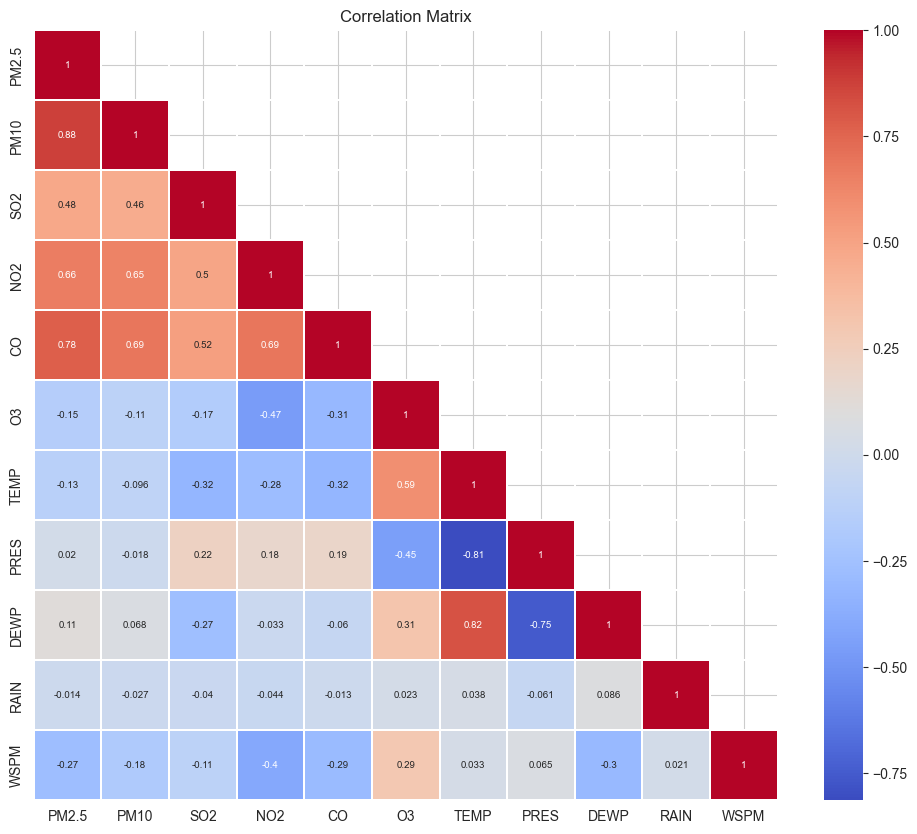

In [113]:
df_airquality_temp = df_airquality_temp.drop(columns=['wd', "station"])
fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(df_airquality_temp.corr()-1) # My preference.
sns.heatmap(df_airquality_temp.corr(), cmap="coolwarm", annot=True, ax=ax, linewidths=.1, annot_kws={"size": 7}, mask=mask)
plt.title('Correlation Matrix')

## 6. Visualization & Explanatory Analysis
#### 6.1 Stasiun manakah yang merekam kualitas udara yang terburuk?

Rata-rata untuk stasiun Aotizhongxin adalah 166.2
Rata-rata untuk stasiun Changping adalah 160
Rata-rata untuk stasiun Dingling adalah 157
Rata-rata untuk stasiun Dongsi adalah 168.2
Rata-rata untuk stasiun Guanyuan adalah 166
Rata-rata untuk stasiun Gucheng adalah 167
Rata-rata untuk stasiun Huairou adalah 158.6
Rata-rata untuk stasiun Nongzhanguan adalah 167.6
Rata-rata untuk stasiun Shunyi adalah 164.4
Rata-rata untuk stasiun Tiantan adalah 166
Rata-rata untuk stasiun Wanliu adalah 166.6
Rata-rata untuk stasiun Wanshouxigong adalah 168.2


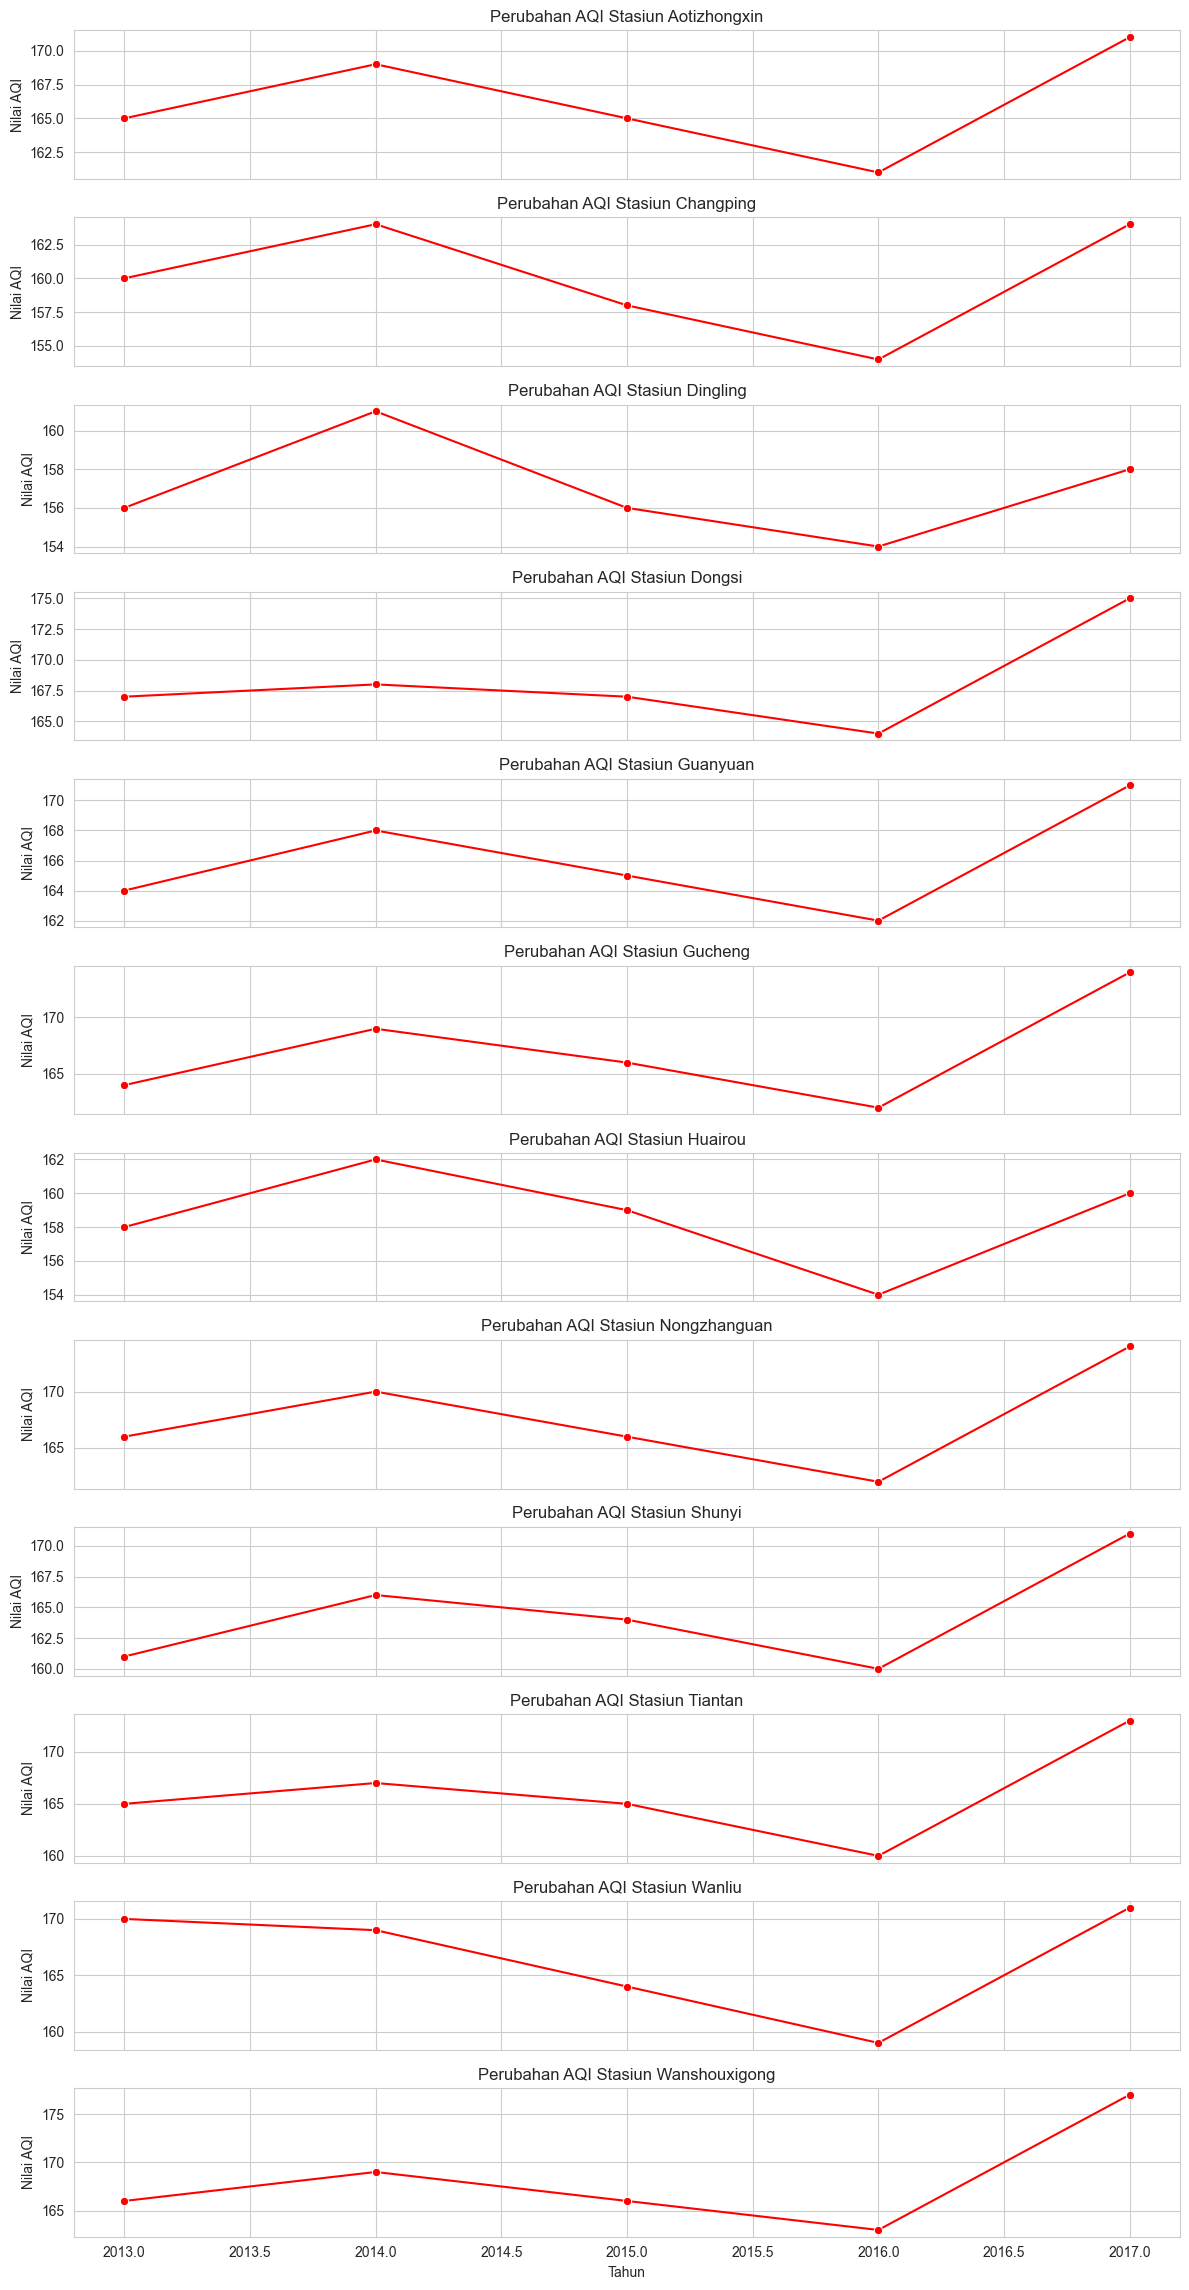

In [114]:
# Dengan menggunakan formulai EQI calculations.dari library python-eqi kita dapat menarik rata-rata dari tiap stasiun dari tahun ke tahun
sns.set_style("whitegrid")

selected_columns = ['PM2.5','PM10']
mean_only = {col: ["mean"] for col in selected_columns}

years = np.arange(df_airquality["year"].min(), df_airquality["year"].max()+1)
fig, axs = plt.subplots(len(station_list), 1, figsize=(12, 23), sharex=True)

for i, station in enumerate(station_list):
    ax = axs[i]
    aqi_values = []
    one_station_at_a_time = df_airquality.query("station == @station")
    for year in years:
        # hanya menggunakan rata-rata dari kadar senyawa yang terekam per tahun.
        year_frame = one_station_at_a_time.query("year == @year").agg(mean_only)
        yearly_aqi = aqi.to_aqi([ 
            (aqi.POLLUTANT_PM25, year_frame["PM2.5"].iloc[0]), #Dirty
            (aqi.POLLUTANT_PM10, year_frame["PM10"].iloc[0])
        ])
        aqi_values.append(yearly_aqi)
    
    # Plot nilai AQI
    sns.lineplot(x=years, y=aqi_values, ax=ax, color='red', marker='o')
    ax.set_xlabel('Tahun')
    ax.set_ylabel('Nilai AQI')
    ax.set_title('Perubahan AQI Stasiun {}'.format(station))
    print("Rata-rata untuk stasiun {} adalah {}".format(station, sum(aqi_values)/len(aqi_values)))

# Tampilkan plot
plt.tight_layout()
plt.show()

Dari data ini bisa dikatakan stasiun Wanshouxigong dan Dongsi pada tahun 2017 ini mendapatkan nilai AQI tertinggi yang melebihi sama dengan 175 dan mendapatkan rata-rata 168,2. Dibalik itu stasiun yang yang paling rendah adalah stasiun Dingling dengan nilai rata-rata 157

#### 6.2 Bagaimana perubahan kualitas udara apabila terjadi hujan?

In [115]:
df_airquality

,date,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,year
0,2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013
1,2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013
2,2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013
3,2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013
4,2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017-02-28 19:00:00,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017
420764,2017-02-28 20:00:00,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017
420765,2017-02-28 21:00:00,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017
420766,2017-02-28 22:00:00,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017


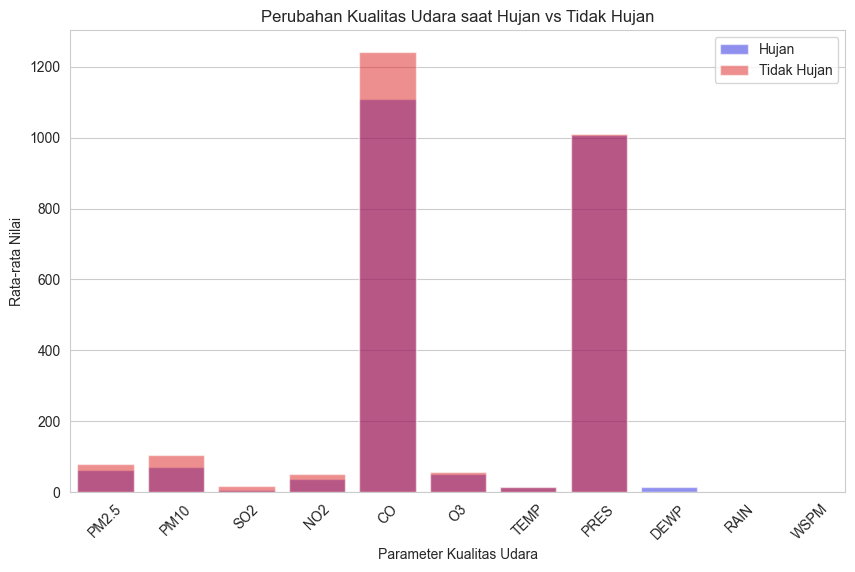

In [116]:
numerical_columns = df_airquality.select_dtypes(include=['float64', 'int64'])

rainy_days = df_airquality[df_airquality['RAIN'] > 0]
non_rainy_days = df_airquality[df_airquality['RAIN'] == 0]

rainy_means = rainy_days[numerical_columns.columns].mean()
non_rainy_means = non_rainy_days[numerical_columns.columns].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=rainy_means.index, y=rainy_means.values, color='blue', alpha=0.5, label='Hujan')
sns.barplot(x=non_rainy_means.index, y=non_rainy_means.values, color='red', alpha=0.5, label='Tidak Hujan')
plt.xlabel('Parameter Kualitas Udara')
plt.ylabel('Rata-rata Nilai')
plt.title('Perubahan Kualitas Udara saat Hujan vs Tidak Hujan')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Terlihat bahwa data stasiun yang merekam kadar senyawa dalam udara pada waktu hujan dan tidak hujan terdapat perbedaan yang dimana pada saat hujan kadar PM2.5, PM10, SO2, NO2, dan CO berpengaruh pada keadaan hujan.

#### 6.3 Apakah distrik yang memiliki nilai polusi tertinggi adalah distrik yang terpanas?

Matrix Korelasi:
           TEMP     PM2.5      PM10       SO2       NO2        CO        O3
TEMP   1.000000 -0.131607 -0.096078 -0.320237 -0.277279 -0.324057  0.592248
PM2.5 -0.131607  1.000000  0.878874  0.478223  0.664306  0.780165 -0.149508
PM10  -0.096078  0.878874  1.000000  0.460572  0.645583  0.691887 -0.110443
SO2   -0.320237  0.478223  0.460572  1.000000  0.495826  0.522678 -0.165311
NO2   -0.277279  0.664306  0.645583  0.495826  1.000000  0.694036 -0.465912
CO    -0.324057  0.780165  0.691887  0.522678  0.694036  1.000000 -0.306979
O3     0.592248 -0.149508 -0.110443 -0.165311 -0.465912 -0.306979  1.000000


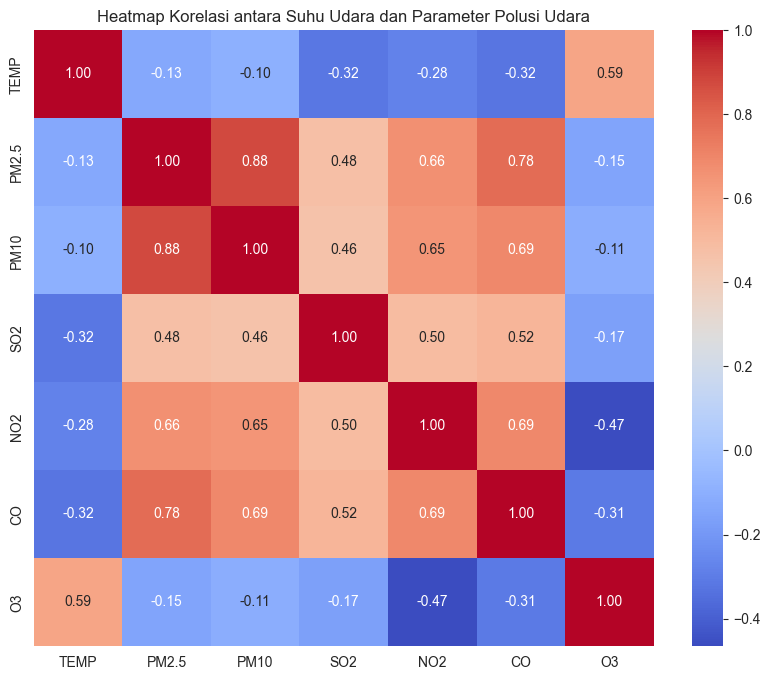

In [117]:
selected_columns = ['TEMP', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Hitung korelasi antara suhu udara dan parameter-parameter polusi udara
correlation_matrix = df_airquality[selected_columns].corr()

# Tampilkan matriks korelasi
print("Matrix Korelasi:")
print(correlation_matrix)

# Visualisasi heatmap untuk matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antara Suhu Udara dan Parameter Polusi Udara')
plt.show()


Dari korelasi ini, Suhu udara memiliki korelasi positif yang kuat dengan kadar ozon (O3) sebesar 0.59, yang menunjukkan bahwa semakin tinggi suhu udara, semakin tinggi pula kadar ozon yang turun ke mendekati tanah.

## Conclusion
1. Stasiun manakah yang merekam kualitas udara yang terburuk?
> Bardasarkan hasil visualisasi dari 12 stasiun di tiap distrik, bahwa hampir semua stasiun berada di jangkauan 150-175 yang dikategorikan berdasarkan AQI (Air Quality Index) Unhealthy. Stasiun Wanshouxigong dan Dongsi mendapatkan nilai rata-rata 168.2.
2. Bagaimana perubahan kualitas udara apabila terjadi hujan?
> Dari visualisasi gambar diatas, dampak hujan terhadap kadar senyawa udara mengalami perubahan yang tidak terlalu signifikan kecuali pada senyawa CO. Dapat ditarik bahwa hujan mampu mengurangi polusi udara walaupun sedikit. 
3. Apakah distrik yang memiliki nilai suhu tinggi adalah distrik yang terpolusi?
> Hasil korelasi yang didapatkan bahwa variabel TEMP hanya memiliki korelasi positif pada kadar O3 yaitu Ozone yang sangat berguna untuk melindungi bumi dari cahaya Ultraviolet tetapi buruk terhadap kesehatan apabila dihirup. Dapat disimpulkan apabila keadaan sedang panas maka lapisan ozone akan turun ke bawah tanah. Selain itu TEMP juga memiliki korelasi negatif yang sedang hingga kuat dengan parameter-parameter polusi lainnya seperti SO2, NO2, dan CO, yang menunjukkan bahwa semakin tinggi suhu udara, semakin rendah kadar polusi tersebut.